In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df_item_lookup = pd.read_csv("item_lookup.csv", encoding='latin-1')
df_fetch_requests = pd.read_csv("lou_mes_retrieval_requests.csv")
df_workbench_jobs = pd.read_csv("lou_workbench_jobs.csv")

In [3]:
df_fetch_requests.head()

,ORG,Line,SKU,FROM_LOCATION,TO_LOCATION,INSERT_DTTM,COMPLETE_DTTM,TRANSPORT_ORDER_TYPE,Duration_in_Minutes
0,LOU,LOU1,SHV02RED0540DRN1,RDD.SSR.031.01.05,RDD.RAW.HOFF.L1,2024-02-15 05:04:41,2024-02-15 05:13:52,Retrieval Request from Mes,9.183333
1,LOU,LOU1,LKRG05DRNNV04RAI,RDD.RSR.N.07.01,RDD.RAW.HOFF.L1,2024-02-15 07:56:19,2024-02-15 08:05:24,Retrieval Request from Mes,9.083333
2,LOU,LOU1,SHV05GRV0540DMN,RDD.RSR.N.09.05,RDD.RAW.HOFF.L1,2024-02-15 10:52:02,2024-02-15 11:06:17,Retrieval Request from Mes,14.250000
3,LOU,LOU5,RM01805,RDD.SSR.014.01.04,RDD.RAW.HOFF.L5,2024-02-15 11:24:36,2024-02-15 12:28:18,Retrieval Request from Mes,63.700000
4,LOU,LOU1,SHV02RED0540DRN1,RDD.SSR.041.01.05,RDD.RAW.HOFF.L1,2024-02-15 12:55:23,2024-02-15 13:17:23,Retrieval Request from Mes,22.000000


In [4]:
df_fetch_requests.head()

,ORG,Line,SKU,FROM_LOCATION,TO_LOCATION,INSERT_DTTM,COMPLETE_DTTM,TRANSPORT_ORDER_TYPE,Duration_in_Minutes
0,LOU,LOU1,SHV02RED0540DRN1,RDD.SSR.031.01.05,RDD.RAW.HOFF.L1,2024-02-15 05:04:41,2024-02-15 05:13:52,Retrieval Request from Mes,9.183333
1,LOU,LOU1,LKRG05DRNNV04RAI,RDD.RSR.N.07.01,RDD.RAW.HOFF.L1,2024-02-15 07:56:19,2024-02-15 08:05:24,Retrieval Request from Mes,9.083333
2,LOU,LOU1,SHV05GRV0540DMN,RDD.RSR.N.09.05,RDD.RAW.HOFF.L1,2024-02-15 10:52:02,2024-02-15 11:06:17,Retrieval Request from Mes,14.250000
3,LOU,LOU5,RM01805,RDD.SSR.014.01.04,RDD.RAW.HOFF.L5,2024-02-15 11:24:36,2024-02-15 12:28:18,Retrieval Request from Mes,63.700000
4,LOU,LOU1,SHV02RED0540DRN1,RDD.SSR.041.01.05,RDD.RAW.HOFF.L1,2024-02-15 12:55:23,2024-02-15 13:17:23,Retrieval Request from Mes,22.000000


In [5]:
df_item_lookup.head()

,item,item_type,description
0,RM02296,LABL,RM02296 Label: Sparkling Ice 17oz Grape Raspbe...
1,FLAPHYWHTCLDV01,INGR,Flavors: White Cloud FASN292 (40LB Pail)
2,SHV02GGZ0524DRN,SHRF,Shrink Film:Northgate Gonzalez DR 0.5L24pk Nes...
3,CTJOJ8Z12PBAHAMV01,CORR,Corrugate: Joint Juice 8oz 12pk Blueberry Acai...
4,LCKK10ZBBS19V01CV,LABL,Label: Kids' Koolers 10oz Berry Blue F Cut-Sta...


In [6]:
df_workbench_jobs.head()

,ORG,PROD_LINE,JOB_NUMBER,ITEM_NUMBER,ITEM_DESCRIPTION,QUANTITY,ACTUAL_QUANTITY,ACTUAL_START_TIME,PLANNED_START_TIME,UOM
0,LOU,LOU1,L00884024,MMK05L40PDMCHNR02,05L.DM.MEMBER'S MARK 20% RPET.40P.N.48.CH,25344.0,25386,2024-01-02 13:37:50,2023-12-31 01:00:00,case
1,LOU,LOU3,2605949_72,DSN05L24PDMRTN,707303 05L.DM.DASANI.24P.N.84.RT,57624.0,53915,2024-01-03 10:49:45,2024-01-02 15:00:00,case
2,LOU,LOU2,L00885584,NDW05L24PDRCHN84,05L.DR.NIAGARA NEW FILM.24P.N.84.CH,5124.0,5128,2024-01-02 15:37:50,2024-01-02 20:32:00,case
3,LOU,LOU2,L00886616,CRF05L24PDRCHN,05L.DR.CRYSTAL FALLS.24P.N.84.CH,7952.0,7982,2024-01-02 18:03:23,2024-01-02 20:35:00,case
4,LOU,LOU2,L00885000,NDW05L24PDRPBN84,05L.DR.NIAGARA NEW FILM.24P.N.84.PB,14220.0,14227,2024-01-02 20:58:45,2024-01-03 01:40:00,case


In [7]:
df_fetch_requests = pd.merge(df_item_lookup, df_fetch_requests, left_on='item', right_on='SKU', how='inner')

In [8]:
df_fetch_requests.head()
df_fetch_requests = df_fetch_requests[["Line", "item", "item_type", "FROM_LOCATION", "TO_LOCATION", "INSERT_DTTM", "COMPLETE_DTTM", "Duration_in_Minutes"]]

In [9]:
df_fetch_requests.head()

,Line,item,item_type,FROM_LOCATION,TO_LOCATION,INSERT_DTTM,COMPLETE_DTTM,Duration_in_Minutes
0,LOU4,RM02296,LABL,RDD.SSR.030.02.04,RDD.RAW.HOFF.L4,2024-06-02 00:22:48,2024-06-02 00:30:58,8.166666
1,LOU4,RM02296,LABL,RDD.RSR.N.14.03,RDD.RAW.HOFF.L4,2024-10-08 05:26:26,2024-10-08 06:31:48,65.366666
2,LOU4,RM02296,LABL,RDD.RSR.N.01.05,RDD.RAW.HOFF.L4,2024-08-01 18:08:49,2024-08-01 18:15:24,6.583333
3,LOU4,RM02296,LABL,RDD.RSR.N.14.03,RDD.RAW.HOFF.L4,2024-08-01 19:09:50,2024-08-01 19:14:37,4.783333
4,LOU3,SHV08KRG0524DRN1,SHRF,RDD.SSR.038.03.05,RDD.RAW.HOFF.L3,2024-05-24 22:00:34,2024-05-24 22:58:17,57.716666


In [10]:
df_fetch_requests["Duration_in_Minutes"].sort_values(ascending=False)

6841    2346.683333
3734    1369.416666
1387    1347.216666
6885    1252.233333
3758     992.600000
           ...     
7035       4.416666
8560       4.316666
4608       4.283333
3416       4.250000
3010       4.150000
Name: Duration_in_Minutes, Length: 11039, dtype: float64

<Axes: xlabel='Duration_in_Minutes', ylabel='Count'>

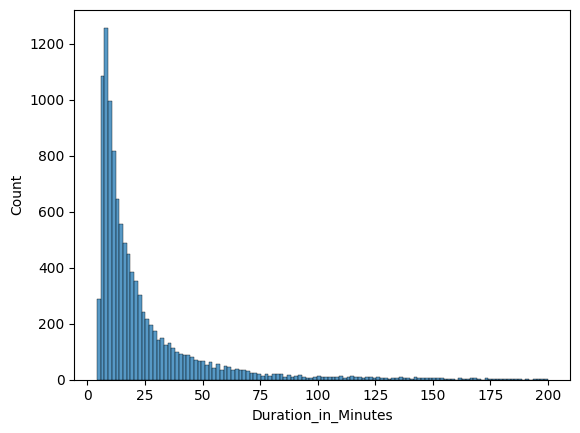

In [11]:
sns.histplot(df_fetch_requests["Duration_in_Minutes"][df_fetch_requests["Duration_in_Minutes"] < 200])

In [33]:
log_minutes = np.log10(df_fetch_requests.Duration_in_Minutes)

Text(0.5, 0, 'Log_10(Duration_in_Minutes)')

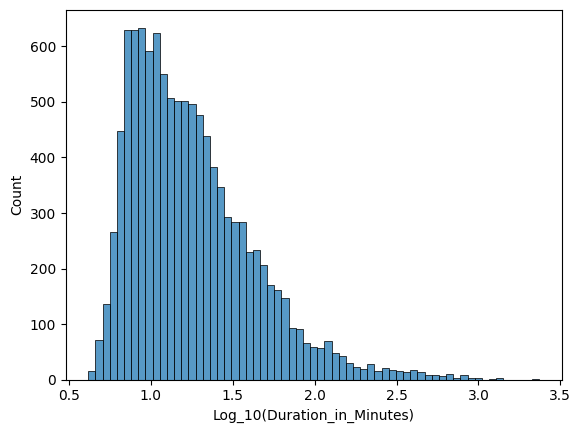

In [35]:
sns.histplot(log_minutes)
plt.xlabel("Log_10(Duration_in_Minutes)")

In [57]:
#df_fetch_requests["INSERT_DTTM"].to_datetime()
df_fetch_requests["INSERT_DATE"] = pd.to_datetime(df_fetch_requests["INSERT_DTTM"]).dt.date
df_fetch_requests["COMPLETE_DATE"] = pd.to_datetime(df_fetch_requests["COMPLETE_DTTM"]).dt.date

In [61]:
df_fetch_requests

,Line,item,item_type,FROM_LOCATION,TO_LOCATION,INSERT_DTTM,COMPLETE_DTTM,Duration_in_Minutes,INSERT_DATE,COMPLETE_DATE
0,LOU4,RM02296,LABL,RDD.SSR.030.02.04,RDD.RAW.HOFF.L4,2024-06-02 00:22:48,2024-06-02 00:30:58,8.166666,2024-06-02,2024-06-02
1,LOU4,RM02296,LABL,RDD.RSR.N.14.03,RDD.RAW.HOFF.L4,2024-10-08 05:26:26,2024-10-08 06:31:48,65.366666,2024-10-08,2024-10-08
2,LOU4,RM02296,LABL,RDD.RSR.N.01.05,RDD.RAW.HOFF.L4,2024-08-01 18:08:49,2024-08-01 18:15:24,6.583333,2024-08-01,2024-08-01
3,LOU4,RM02296,LABL,RDD.RSR.N.14.03,RDD.RAW.HOFF.L4,2024-08-01 19:09:50,2024-08-01 19:14:37,4.783333,2024-08-01,2024-08-01
4,LOU3,SHV08KRG0524DRN1,SHRF,RDD.SSR.038.03.05,RDD.RAW.HOFF.L3,2024-05-24 22:00:34,2024-05-24 22:58:17,57.716666,2024-05-24,2024-05-24
...,...,...,...,...,...,...,...,...,...,...
11034,LOU2,SHV01CLR19175C,SHRF,RDD.SSR.030.02.04,RDD.RAW.HOFF.L2,2024-04-01 07:46:44,2024-04-01 07:53:59,7.250000,2024-04-01,2024-04-01
11035,LOU3,SHV01CLR19175C,SHRF,RDD.RSR.N.27.01,RDD.RAW.HOFF.L3,2024-04-24 04:51:19,2024-04-24 04:57:00,5.683333,2024-04-24,2024-04-24
11036,LOU3,SHV01CLR19175C,SHRF,RDD.RSR.N.05.01,RDD.RAW.HOFF.L3,2024-01-22 18:31:11,2024-01-22 19:04:34,33.383333,2024-01-22,2024-01-22
11037,LOU2,SHV01CLR19175C,SHRF,RDD.SSR.016.03.04,RDD.RAW.HOFF.L2,2024-01-23 08:19:53,2024-01-23 10:10:15,110.366666,2024-01-23,2024-01-23


In [62]:
df_produced = pd.read_csv("lou_total_cases_produced.csv")
df_produced["Date"] = pd.to_datetime(df_produced["Date"], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')
df_produced

,ORG,Prod_Line,Date,Total_Cases_Produced
0,LOU,LOU1,2024-01-02,39555
1,LOU,LOU2,2024-01-02,27337
2,LOU,LOU1,2024-01-03,56233
3,LOU,LOU2,2024-01-03,104646
4,LOU,LOU3,2024-01-03,53915
...,...,...,...,...
1551,LOU,LOU2,2025-03-11,9669
1552,LOU,LOU4,2025-03-11,522641
1553,LOU,LOU5,2025-03-11,13881
1554,LOU,LOU2,2025-03-12,54734


In [65]:
df_shipped = pd.read_csv('lou_total_cases_shipped.csv')
df_shipped["SHIPPED_DATE"] = pd.to_datetime(df_shipped["SHIPPED_DATE"], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')
df_shipped

,ORG,SHIPPED_DATE,Total_Cases_Shipped
0,LOU,2024-10-13,194053
1,LOU,2024-10-14,196994
2,LOU,2024-10-15,189820
3,LOU,2024-10-16,199554
4,LOU,2024-10-17,243891
...,...,...,...
145,LOU,2025-03-08,199623
146,LOU,2025-03-09,177684
147,LOU,2025-03-10,179038
148,LOU,2025-03-11,234156


In [80]:
df_fetch_requests["INSERT_DATE"] = pd.to_datetime(df_fetch_requests["INSERT_DATE"])
df_fetch_requests["COMPLETE_DATE"] = pd.to_datetime(df_fetch_requests["COMPLETE_DATE"])
df_fetch_requests["INSERT_DTTM"] = pd.to_datetime(df_fetch_requests["INSERT_DTTM"])
df_fetch_requests["COMPLETE_DTTM"] = pd.to_datetime(df_fetch_requests["COMPLETE_DTTM"])
#df_fetch_requests.dtypes

In [82]:
df_produced["Date"] = pd.to_datetime(df_produced["Date"])
df_shipped["SHIPPED_DATE"] = pd.to_datetime(df_shipped["SHIPPED_DATE"])

In [84]:
df_fetch_requests = pd.merge(df_fetch_requests, df_produced, left_on='INSERT_DATE', right_on='Date', how='left')
df_fetch_requests

,Line,item,item_type,FROM_LOCATION,TO_LOCATION,INSERT_DTTM,COMPLETE_DTTM,Duration_in_Minutes,INSERT_DATE,COMPLETE_DATE,ORG,Prod_Line,Date,Total_Cases_Produced
0,LOU4,RM02296,LABL,RDD.SSR.030.02.04,RDD.RAW.HOFF.L4,2024-06-02 00:22:48,2024-06-02 00:30:58,8.166666,2024-06-02,2024-06-02,LOU,LOU1,2024-06-02,107705.0
1,LOU4,RM02296,LABL,RDD.SSR.030.02.04,RDD.RAW.HOFF.L4,2024-06-02 00:22:48,2024-06-02 00:30:58,8.166666,2024-06-02,2024-06-02,LOU,LOU2,2024-06-02,80561.0
2,LOU4,RM02296,LABL,RDD.SSR.030.02.04,RDD.RAW.HOFF.L4,2024-06-02 00:22:48,2024-06-02 00:30:58,8.166666,2024-06-02,2024-06-02,LOU,LOU4,2024-06-02,78360.0
3,LOU4,RM02296,LABL,RDD.SSR.030.02.04,RDD.RAW.HOFF.L4,2024-06-02 00:22:48,2024-06-02 00:30:58,8.166666,2024-06-02,2024-06-02,LOU,LOU5,2024-06-02,128212.0
4,LOU4,RM02296,LABL,RDD.RSR.N.14.03,RDD.RAW.HOFF.L4,2024-10-08 05:26:26,2024-10-08 06:31:48,65.366666,2024-10-08,2024-10-08,LOU,LOU1,2024-10-08,25220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40448,LOU2,SHV01CLR19175C,SHRF,RDD.SSR.016.03.04,RDD.RAW.HOFF.L2,2024-01-23 08:19:53,2024-01-23 10:10:15,110.366666,2024-01-23,2024-01-23,LOU,LOU5,2024-01-23,46429.0
40449,LOU3,SHV01CLR19175C,SHRF,RDD.RSR.N.29.02,RDD.RAW.HOFF.L3,2024-05-10 11:40:16,2024-05-10 12:33:37,53.350000,2024-05-10,2024-05-10,LOU,LOU1,2024-05-10,175594.0
40450,LOU3,SHV01CLR19175C,SHRF,RDD.RSR.N.29.02,RDD.RAW.HOFF.L3,2024-05-10 11:40:16,2024-05-10 12:33:37,53.350000,2024-05-10,2024-05-10,LOU,LOU2,2024-05-10,25390.0
40451,LOU3,SHV01CLR19175C,SHRF,RDD.RSR.N.29.02,RDD.RAW.HOFF.L3,2024-05-10 11:40:16,2024-05-10 12:33:37,53.350000,2024-05-10,2024-05-10,LOU,LOU3,2024-05-10,112420.0


In [94]:
df_fetch_requests = pd.merge(df_fetch_requests, df_shipped, left_on='INSERT_DATE', right_on='SHIPPED_DATE', how='inner')
df_fetch_requests

,Line,item,item_type,FROM_LOCATION,TO_LOCATION,INSERT_DTTM,COMPLETE_DTTM,Duration_in_Minutes,INSERT_DATE,COMPLETE_DATE,ORG_x,Prod_Line,Date,Total_Cases_Produced,ORG_y,SHIPPED_DATE,Total_Cases_Shipped
0,LOU2,SHV08KRG0524DRN1,SHRF,RDD.RSR.N.11.05,RDD.RAW.HOFF.L2,2024-12-06 01:16:19,2024-12-06 01:28:58,12.650000,2024-12-06,2024-12-06,LOU,LOU1,2024-12-06,67710.0,LOU,2024-12-06,177948
1,LOU2,SHV08KRG0524DRN1,SHRF,RDD.RSR.N.11.05,RDD.RAW.HOFF.L2,2024-12-06 01:16:19,2024-12-06 01:28:58,12.650000,2024-12-06,2024-12-06,LOU,LOU2,2024-12-06,95307.0,LOU,2024-12-06,177948
2,LOU2,SHV08KRG0524DRN1,SHRF,RDD.RSR.N.11.05,RDD.RAW.HOFF.L2,2024-12-06 01:16:19,2024-12-06 01:28:58,12.650000,2024-12-06,2024-12-06,LOU,LOU4,2024-12-06,915200.0,LOU,2024-12-06,177948
3,LOU2,SHV08KRG0524DRN1,SHRF,RDD.RSR.N.06.02,RDD.RAW.HOFF.L2,2024-12-06 11:16:37,2024-12-06 11:27:36,10.983333,2024-12-06,2024-12-06,LOU,LOU1,2024-12-06,67710.0,LOU,2024-12-06,177948
4,LOU2,SHV08KRG0524DRN1,SHRF,RDD.RSR.N.06.02,RDD.RAW.HOFF.L2,2024-12-06 11:16:37,2024-12-06 11:27:36,10.983333,2024-12-06,2024-12-06,LOU,LOU2,2024-12-06,95307.0,LOU,2024-12-06,177948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12749,LOU3,SHV03AQF0532DRNC,SHRF,RDD.SSR.034.02.04,RDD.RAW.HOFF.L3,2024-12-02 03:56:39,2024-12-02 04:02:47,6.133333,2024-12-02,2024-12-02,LOU,LOU5,2024-12-02,80064.0,LOU,2024-12-02,169226
12750,LOU3,SHV03AQF0532DRNC,SHRF,RDD.RSR.N.05.01,RDD.RAW.HOFF.L3,2025-02-07 06:26:01,2025-02-07 06:43:04,17.050000,2025-02-07,2025-02-07,LOU,LOU1,2025-02-07,61739.0,LOU,2025-02-07,225408
12751,LOU3,SHV03AQF0532DRNC,SHRF,RDD.RSR.N.05.01,RDD.RAW.HOFF.L3,2025-02-07 06:26:01,2025-02-07 06:43:04,17.050000,2025-02-07,2025-02-07,LOU,LOU2,2025-02-07,83620.0,LOU,2025-02-07,225408
12752,LOU3,SHV03AQF0532DRNC,SHRF,RDD.RSR.N.05.01,RDD.RAW.HOFF.L3,2025-02-07 06:26:01,2025-02-07 06:43:04,17.050000,2025-02-07,2025-02-07,LOU,LOU3,2025-02-07,145998.0,LOU,2025-02-07,225408


In [96]:
df_fetch_requests = df_fetch_requests[["Line","item","item_type","FROM_LOCATION","TO_LOCATION","INSERT_DTTM","COMPLETE_DTTM","Duration_in_Minutes","INSERT_DATE","COMPLETE_DATE","Total_Cases_Produced","Total_Cases_Shipped"]]

In [114]:
df_fetch_requests.columns = df_fetch_requests.columns.str.lower().str.replace(' ', '_')

In [117]:
df_fetch_requests = df_fetch_requests.rename(columns={"total_cases_produced": "total_cases_produced_for_day","total_cases_shipped": "total_cases_shipped_for_day", "test":"line"})
df_fetch_requests

,line,item,item_type,from_location,to_location,insert_dttm,complete_dttm,duration_in_minutes,insert_date,complete_date,total_cases_produced_for_day,total_cases_shipped_for_day
0,LOU2,SHV08KRG0524DRN1,SHRF,RDD.RSR.N.11.05,RDD.RAW.HOFF.L2,2024-12-06 01:16:19,2024-12-06 01:28:58,12.650000,2024-12-06,2024-12-06,67710.0,177948
1,LOU2,SHV08KRG0524DRN1,SHRF,RDD.RSR.N.11.05,RDD.RAW.HOFF.L2,2024-12-06 01:16:19,2024-12-06 01:28:58,12.650000,2024-12-06,2024-12-06,95307.0,177948
2,LOU2,SHV08KRG0524DRN1,SHRF,RDD.RSR.N.11.05,RDD.RAW.HOFF.L2,2024-12-06 01:16:19,2024-12-06 01:28:58,12.650000,2024-12-06,2024-12-06,915200.0,177948
3,LOU2,SHV08KRG0524DRN1,SHRF,RDD.RSR.N.06.02,RDD.RAW.HOFF.L2,2024-12-06 11:16:37,2024-12-06 11:27:36,10.983333,2024-12-06,2024-12-06,67710.0,177948
4,LOU2,SHV08KRG0524DRN1,SHRF,RDD.RSR.N.06.02,RDD.RAW.HOFF.L2,2024-12-06 11:16:37,2024-12-06 11:27:36,10.983333,2024-12-06,2024-12-06,95307.0,177948
...,...,...,...,...,...,...,...,...,...,...,...,...
12749,LOU3,SHV03AQF0532DRNC,SHRF,RDD.SSR.034.02.04,RDD.RAW.HOFF.L3,2024-12-02 03:56:39,2024-12-02 04:02:47,6.133333,2024-12-02,2024-12-02,80064.0,169226
12750,LOU3,SHV03AQF0532DRNC,SHRF,RDD.RSR.N.05.01,RDD.RAW.HOFF.L3,2025-02-07 06:26:01,2025-02-07 06:43:04,17.050000,2025-02-07,2025-02-07,61739.0,225408
12751,LOU3,SHV03AQF0532DRNC,SHRF,RDD.RSR.N.05.01,RDD.RAW.HOFF.L3,2025-02-07 06:26:01,2025-02-07 06:43:04,17.050000,2025-02-07,2025-02-07,83620.0,225408
12752,LOU3,SHV03AQF0532DRNC,SHRF,RDD.RSR.N.05.01,RDD.RAW.HOFF.L3,2025-02-07 06:26:01,2025-02-07 06:43:04,17.050000,2025-02-07,2025-02-07,145998.0,225408


In [120]:
df_fetch_requests["duration_in_minutes"] = df_fetch_requests["duration_in_minutes"].round(2)

In [121]:
df_fetch_requests

,line,item,item_type,from_location,to_location,insert_dttm,complete_dttm,duration_in_minutes,insert_date,complete_date,total_cases_produced_for_day,total_cases_shipped_for_day
0,LOU2,SHV08KRG0524DRN1,SHRF,RDD.RSR.N.11.05,RDD.RAW.HOFF.L2,2024-12-06 01:16:19,2024-12-06 01:28:58,12.65,2024-12-06,2024-12-06,67710.0,177948
1,LOU2,SHV08KRG0524DRN1,SHRF,RDD.RSR.N.11.05,RDD.RAW.HOFF.L2,2024-12-06 01:16:19,2024-12-06 01:28:58,12.65,2024-12-06,2024-12-06,95307.0,177948
2,LOU2,SHV08KRG0524DRN1,SHRF,RDD.RSR.N.11.05,RDD.RAW.HOFF.L2,2024-12-06 01:16:19,2024-12-06 01:28:58,12.65,2024-12-06,2024-12-06,915200.0,177948
3,LOU2,SHV08KRG0524DRN1,SHRF,RDD.RSR.N.06.02,RDD.RAW.HOFF.L2,2024-12-06 11:16:37,2024-12-06 11:27:36,10.98,2024-12-06,2024-12-06,67710.0,177948
4,LOU2,SHV08KRG0524DRN1,SHRF,RDD.RSR.N.06.02,RDD.RAW.HOFF.L2,2024-12-06 11:16:37,2024-12-06 11:27:36,10.98,2024-12-06,2024-12-06,95307.0,177948
...,...,...,...,...,...,...,...,...,...,...,...,...
12749,LOU3,SHV03AQF0532DRNC,SHRF,RDD.SSR.034.02.04,RDD.RAW.HOFF.L3,2024-12-02 03:56:39,2024-12-02 04:02:47,6.13,2024-12-02,2024-12-02,80064.0,169226
12750,LOU3,SHV03AQF0532DRNC,SHRF,RDD.RSR.N.05.01,RDD.RAW.HOFF.L3,2025-02-07 06:26:01,2025-02-07 06:43:04,17.05,2025-02-07,2025-02-07,61739.0,225408
12751,LOU3,SHV03AQF0532DRNC,SHRF,RDD.RSR.N.05.01,RDD.RAW.HOFF.L3,2025-02-07 06:26:01,2025-02-07 06:43:04,17.05,2025-02-07,2025-02-07,83620.0,225408
12752,LOU3,SHV03AQF0532DRNC,SHRF,RDD.RSR.N.05.01,RDD.RAW.HOFF.L3,2025-02-07 06:26:01,2025-02-07 06:43:04,17.05,2025-02-07,2025-02-07,145998.0,225408


In [124]:
features_list = list(df_fetch_requests.columns)
features_list

['line',
 'item',
 'item_type',
 'from_location',
 'to_location',
 'insert_dttm',
 'complete_dttm',
 'duration_in_minutes',
 'insert_date',
 'complete_date',
 'total_cases_produced_for_day',
 'total_cases_shipped_for_day']

In [125]:
for v in ['LOU1', 'LOU2', 'LOU3', 'LOU4', 'LOU5']:
    feature = f"line_{v}"
    df_fetch_requests[feature] = (df_fetch_requests["line"] == v).astype(int)
    features_list.append(feature)

In [128]:
for v in ['SHRF', 'LABL']:
    feature = f"item_type_{v}"
    df_fetch_requests[feature] = (df_fetch_requests["item_type"] == v).astype(int)
    features_list.append(feature)

In [133]:
df_fetch_requests.from_location.value_counts()

from_location
RDD.RSR.N.19.03      106
RDD.RSR.N.26.05      105
RDD.RSR.N.09.01       97
RDD.RSR.N.29.05       94
RDD.RSR.N.23.04       89
                    ... 
RDD.SSR.023.01.04      3
RDD.SSR.070.02.05      3
RDD.SSR.041.01.04      3
RDD.SSR.057.02.04      3
RDD.SSR.008.02.05      3
Name: count, Length: 528, dtype: int64

In [139]:
df_fetch_requests["storage_location_type"] = df_fetch_requests["from_location"].str[4:7]

In [140]:
df_fetch_requests.head()

,line,item,item_type,from_location,to_location,insert_dttm,complete_dttm,duration_in_minutes,insert_date,complete_date,total_cases_produced_for_day,total_cases_shipped_for_day,line_LOU1,line_LOU2,line_LOU3,line_LOU4,line_LOU5,item_type_SHRF,item_type_LABL,storage_location_type
0,LOU2,SHV08KRG0524DRN1,SHRF,RDD.RSR.N.11.05,RDD.RAW.HOFF.L2,2024-12-06 01:16:19,2024-12-06 01:28:58,12.65,2024-12-06,2024-12-06,67710.0,177948,0,1,0,0,0,1,0,RSR
1,LOU2,SHV08KRG0524DRN1,SHRF,RDD.RSR.N.11.05,RDD.RAW.HOFF.L2,2024-12-06 01:16:19,2024-12-06 01:28:58,12.65,2024-12-06,2024-12-06,95307.0,177948,0,1,0,0,0,1,0,RSR
2,LOU2,SHV08KRG0524DRN1,SHRF,RDD.RSR.N.11.05,RDD.RAW.HOFF.L2,2024-12-06 01:16:19,2024-12-06 01:28:58,12.65,2024-12-06,2024-12-06,915200.0,177948,0,1,0,0,0,1,0,RSR
3,LOU2,SHV08KRG0524DRN1,SHRF,RDD.RSR.N.06.02,RDD.RAW.HOFF.L2,2024-12-06 11:16:37,2024-12-06 11:27:36,10.98,2024-12-06,2024-12-06,67710.0,177948,0,1,0,0,0,1,0,RSR
4,LOU2,SHV08KRG0524DRN1,SHRF,RDD.RSR.N.06.02,RDD.RAW.HOFF.L2,2024-12-06 11:16:37,2024-12-06 11:27:36,10.98,2024-12-06,2024-12-06,95307.0,177948,0,1,0,0,0,1,0,RSR


In [141]:
for v in ['RSR', 'SSR']:
    feature = f"storage_location_type_{v}"
    df_fetch_requests[feature] = (df_fetch_requests["storage_location_type"] == v).astype(int)
    features_list.append(feature)

In [145]:
df_fetch_requests.dtypes

line                                    object
item                                    object
item_type                               object
from_location                           object
to_location                             object
insert_dttm                     datetime64[ns]
complete_dttm                   datetime64[ns]
duration_in_minutes                    float64
insert_date                     datetime64[ns]
complete_date                   datetime64[ns]
total_cases_produced_for_day           float64
total_cases_shipped_for_day              int64
line_LOU1                                int64
line_LOU2                                int64
line_LOU3                                int64
line_LOU4                                int64
line_LOU5                                int64
item_type_SHRF                           int64
item_type_LABL                           int64
storage_location_type                   object
storage_location_type_RSR                int64
storage_locat

In [155]:
numerical_matrix_df = df_fetch_requests.select_dtypes(include=['int64', 'float'])

In [156]:
numerical_matrix_df

,duration_in_minutes,total_cases_produced_for_day,total_cases_shipped_for_day,line_LOU1,line_LOU2,line_LOU3,line_LOU4,line_LOU5,item_type_SHRF,item_type_LABL,storage_location_type_RSR,storage_location_type_SSR
0,12.65,67710.0,177948,0,1,0,0,0,1,0,1,0
1,12.65,95307.0,177948,0,1,0,0,0,1,0,1,0
2,12.65,915200.0,177948,0,1,0,0,0,1,0,1,0
3,10.98,67710.0,177948,0,1,0,0,0,1,0,1,0
4,10.98,95307.0,177948,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12749,6.13,80064.0,169226,0,0,1,0,0,1,0,0,1
12750,17.05,61739.0,225408,0,0,1,0,0,1,0,1,0
12751,17.05,83620.0,225408,0,0,1,0,0,1,0,1,0
12752,17.05,145998.0,225408,0,0,1,0,0,1,0,1,0


In [170]:
# def prepare_X(df):
#     df = df.copy()
#     target_variables = ['duration_in_minutes']
#     df = df.drop([x for x in target_variables if x in df.columns], axis=1)

#     unecessary_columns = ['line_LOU5', 'item_type_LABL', 'storage_location_type_SSR']
#     df = df.drop([x for x in target_variables if x in df.columns], axis=1)

#     X = df.values
#     return X


In [171]:
# prepare_X(numerical_matrix_df)

array([[6.77100e+04, 1.77948e+05, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [9.53070e+04, 1.77948e+05, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [9.15200e+05, 1.77948e+05, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       ...,
       [8.36200e+04, 2.25408e+05, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [1.45998e+05, 2.25408e+05, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [5.81131e+05, 2.25408e+05, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00]])

In [172]:
# np.random.seed(2)

# n = len(numerical_matrix_df)

# n_val = int(0.2 * n)
# n_test = int(0.2 * n)
# n_train = n - (n_val + n_test)

# idx = np.arange(n)
# np.random.shuffle(idx)

# df_shuffled = numerical_matrix_df.iloc[idx]

# df_train = df_shuffled.iloc[:n_train].copy()
# df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
# df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [173]:
# y_train_orig = df_train.duration_in_minutes.values
# y_val_orig = df_val.duration_in_minutes.values
# y_test_orig = df_test.duration_in_minutes.values

# y_train = np.log10(df_train.duration_in_minutes.values)
# y_val = np.log10(df_val.duration_in_minutes.values)
# y_test = np.log10(df_test.duration_in_minutes.values)

In [226]:
# Start with your original DataFrame (before the numerical conversion)
df_fetch_requests_enriched = df_fetch_requests.copy()

# 1. Handle Rare Locations
location_counts = df_fetch_requests_enriched['from_location'].value_counts()
rare_locations = location_counts[location_counts < 10].index
df_fetch_requests_enriched['location_grouped'] = df_fetch_requests_enriched['from_location'].apply(
    lambda x: 'RARE_LOCATION' if x in rare_locations else x
)

# 2. Add Location Statistics
location_avg = df_fetch_requests_enriched.groupby('location_grouped')['duration_in_minutes'].mean().to_dict()
location_median = df_fetch_requests_enriched.groupby('location_grouped')['duration_in_minutes'].median().to_dict()
location_std = df_fetch_requests_enriched.groupby('location_grouped')['duration_in_minutes'].std().fillna(0).to_dict()

df_fetch_requests_enriched['location_avg_time'] = df_fetch_requests_enriched['location_grouped'].map(location_avg)
df_fetch_requests_enriched['location_median_time'] = df_fetch_requests_enriched['location_grouped'].map(location_median)
df_fetch_requests_enriched['location_std_time'] = df_fetch_requests_enriched['location_grouped'].map(location_std)

# 3. Add Cross Features
df_fetch_requests_enriched['rsr_with_shrf'] = ((df_fetch_requests_enriched['storage_location_type'] == 'RSR') & 
                                           (df_fetch_requests_enriched['item_type'] == 'SHRF')).astype(int)
df_fetch_requests_enriched['ssr_with_labl'] = ((df_fetch_requests_enriched['storage_location_type'] == 'SSR') & 
                                           (df_fetch_requests_enriched['item_type'] == 'LABL')).astype(int)

# Time-based features from insert_dttm
df_fetch_requests_enriched['hour_of_day'] = df_fetch_requests_enriched['insert_dttm'].dt.hour
df_fetch_requests_enriched['day_of_week'] = df_fetch_requests_enriched['insert_dttm'].dt.dayofweek  # 0=Monday, 6=Sunday

# Create one-hot encoding for hour of day and day of week
for hour in range(24):
    df_fetch_requests_enriched[f'hour_{hour}'] = (df_fetch_requests_enriched['hour_of_day'] == hour).astype(int)

for day in range(7):
    df_fetch_requests_enriched[f'day_{day}'] = (df_fetch_requests_enriched['day_of_week'] == day).astype(int)

# Add features for business hours vs. off-hours
df_fetch_requests_enriched['business_hours'] = ((df_fetch_requests_enriched['hour_of_day'] >= 8) & 
                                           (df_fetch_requests_enriched['hour_of_day'] < 17) &
                                           (df_fetch_requests_enriched['day_of_week'] < 5)).astype(int)

df_fetch_requests_enriched['night_shift'] = ((df_fetch_requests_enriched['hour_of_day'] >= 19) | 
                                        (df_fetch_requests_enriched['hour_of_day'] < 7)).astype(int)

df_fetch_requests_enriched['weekend'] = (df_fetch_requests_enriched['day_of_week'] >= 5).astype(int)

# Calculate cases produced/shipped ratios
# Add a small value to avoid division by zero
epsilon = 1e-10
df_fetch_requests_enriched['cases_ratio'] = df_fetch_requests_enriched['total_cases_produced_for_day'] / (df_fetch_requests_enriched['total_cases_shipped_for_day'] + epsilon)

# Cap extreme ratios to prevent outliers
df_fetch_requests_enriched['cases_ratio'] = df_fetch_requests_enriched['cases_ratio'].clip(0, 10)

# Hour + item_type interaction features
df_fetch_requests_enriched['morning_shrf'] = ((df_fetch_requests_enriched['hour_of_day'] < 12) & 
                                         (df_fetch_requests_enriched['item_type'] == 'SHRF')).astype(int)

df_fetch_requests_enriched['evening_labl'] = ((df_fetch_requests_enriched['hour_of_day'] >= 19) & 
                                         (df_fetch_requests_enriched['item_type'] == 'LABL')).astype(int)

# Update numerical_columns to include new features
numerical_columns = [
    'duration_in_minutes', 'total_cases_produced_for_day', 'total_cases_shipped_for_day',
    'line_LOU1', 'line_LOU2', 'line_LOU3', 'line_LOU4', 'line_LOU5',
    'item_type_SHRF', 'item_type_LABL', 'storage_location_type_RSR', 'storage_location_type_SSR',
    'location_avg_time', 'location_median_time', 'location_std_time',
    'rsr_with_shrf', 'ssr_with_labl',
    'cases_ratio',
    'business_hours', 'night_shift', 'weekend',
    'morning_shrf', 'evening_labl'
]

# Add hour and day dummy variables (dropping one from each to avoid multicollinearity)
for hour in range(1, 24):  # Skip hour_0 as the reference category
    numerical_columns.append(f'hour_{hour}')

for day in range(1, 7):  # Skip day_0 (Monday) as the reference category
    numerical_columns.append(f'day_{day}')

# Create the numerical matrix with our enhanced features
df_numerical = df_fetch_requests_enriched[numerical_columns]

# Then continue with your existing train/val/test split logic
np.random.seed(2)
n = len(df_numerical)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df_numerical.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [206]:
def prepare_X(df):
    df = df.copy()
    
    # Remove target variable if it exists
    if 'duration_in_minutes' in df.columns:
        df = df.drop('duration_in_minutes', axis=1)
    
    # Drop one category from each set of dummy variables to avoid multicollinearity
    columns_to_drop = ['line_LOU5', 'item_type_LABL', 'storage_location_type_SSR']
    df = df.drop([x for x in columns_to_drop if x in df.columns], axis=1)
    
    X = df.values
    return X

In [207]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [227]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [228]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [229]:
X_train = prepare_X(df_train)

In [231]:
for r in [0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print(w_0, w)

0.845091536351937 [-1.41226548e-07  1.36352072e-06 -3.22208774e-01 -3.32107653e-01
 -3.31217541e-01 -2.77127684e-01  2.00146592e-01  2.38079510e-01
  5.06024949e-03  5.86503657e-03 -1.40405550e-03 -2.06066097e-01
  2.00799320e-01  2.84744866e-02 -4.59408643e-02 -2.41108321e-03
  3.37440767e-02  1.72405673e-02 -1.50954112e-02 -6.99291297e-02
 -7.70915230e-02 -3.82271201e-02 -1.05165567e-02 -2.33473695e-02
 -7.35482267e-03 -4.72080629e-02  6.46610870e-02  2.70031731e-02
  6.74791423e-02  8.04521611e-02  1.14469773e-01  6.23009305e-02
  1.34681000e-01  1.46038264e-01  5.80910523e-02  1.95680769e-02
  1.19965984e-01  4.69352828e-02  5.47755278e-02  1.35881220e-02
  9.72598480e-03 -8.63568470e-02  6.72316067e-02  2.69459177e-02
  5.97279921e-02  1.05520451e-01  5.16628590e-02 -1.79187740e-02]
0.844991152566041 [-1.41290228e-07  1.36376708e-06 -3.22157066e-01 -3.32054982e-01
 -3.31165879e-01 -2.77059302e-01  2.00132127e-01  2.38051434e-01
  5.06037501e-03  5.86519772e-03 -1.40407170e-03 -2.0

In [232]:

for r in [0.001, 0.01, 0.1, 1, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[8], w[10]))

0.001, 0.85, 0.01, -0.00
 0.01, 0.84, 0.01, -0.00
  0.1, 0.84, 0.01, -0.00
    1, 0.83, 0.01, -0.00
   10, 0.75, 0.01, -0.00
  100, 0.41, 0.01, -0.00


In [233]:
w_0

np.float64(0.40958384455355723)

In [234]:
def predict(X, w_0, w):
    return w_0 + X.dot(w)

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

# Test different r values and measure performance
r_values = [0.001, 0.01, 0.1, 1, 10, 100]
X_val = prepare_X(df_val)  # Same preparation as for X_train

for r in r_values:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    
    y_train_pred = predict(X_train, w_0, w)
    train_rmse = rmse(y_train, y_train_pred)
    
    y_val_pred = predict(X_val, w_0, w)
    val_rmse = rmse(y_val, y_val_pred)
    
    print(f'r={r}: Training RMSE={train_rmse:.4f}, Validation RMSE={val_rmse:.4f}')

r=0.001: Training RMSE=0.3330, Validation RMSE=0.3317
r=0.01: Training RMSE=0.3330, Validation RMSE=0.3317
r=0.1: Training RMSE=0.3330, Validation RMSE=0.3317
r=1: Training RMSE=0.3330, Validation RMSE=0.3317
r=10: Training RMSE=0.3333, Validation RMSE=0.3319
r=100: Training RMSE=0.3391, Validation RMSE=0.3371


In [235]:
from matplotlib import pyplot as plt

Text(0.5, 0, 'Log10(duration_in_minutes)')

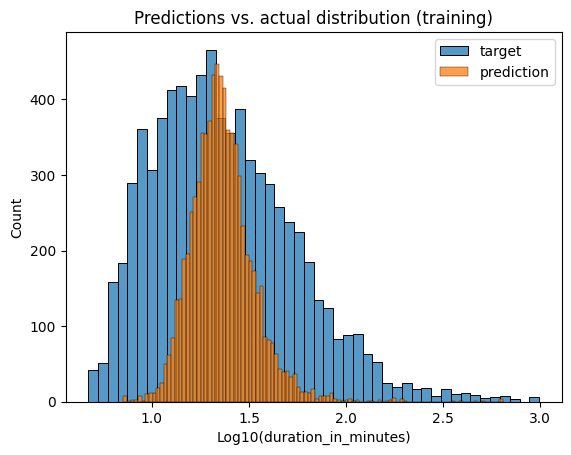

In [236]:
sns.histplot(y_train, label='target')
sns.histplot(y_train_pred, label='prediction')

plt.legend()
plt.title('Predictions vs. actual distribution (training)')
plt.xlabel('Log10(duration_in_minutes)')

<Axes: ylabel='Count'>

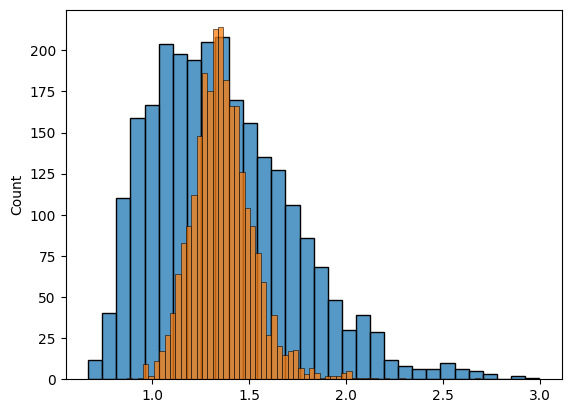

In [237]:
sns.histplot(y_val)
sns.histplot(y_val_pred)

In [241]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare data
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

# Train a random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_train_pred_rf = rf_model.predict(X_train)
y_val_pred_rf = rf_model.predict(X_val)

# Calculate RMSE
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
val_rmse_rf = np.sqrt(mean_squared_error(y_val, y_val_pred_rf))

print(f"RF Training RMSE: {train_rmse_rf:.4f}")
print(f"RF Validation RMSE: {val_rmse_rf:.4f}")

RF Training RMSE: 0.0678
RF Validation RMSE: 0.1713


Text(0.5, 0, 'Log10(duration_in_minutes)')

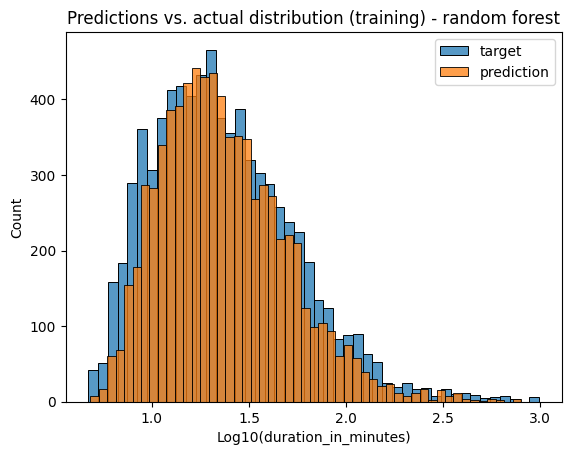

In [246]:
sns.histplot(y_train, label='target')
sns.histplot(y_train_pred_rf, label='prediction')

plt.legend()
plt.title('Predictions vs. actual distribution (training) - random forest')
plt.xlabel('Log10(duration_in_minutes)')

Text(0.5, 0, 'Log10(duration_in_minutes)')

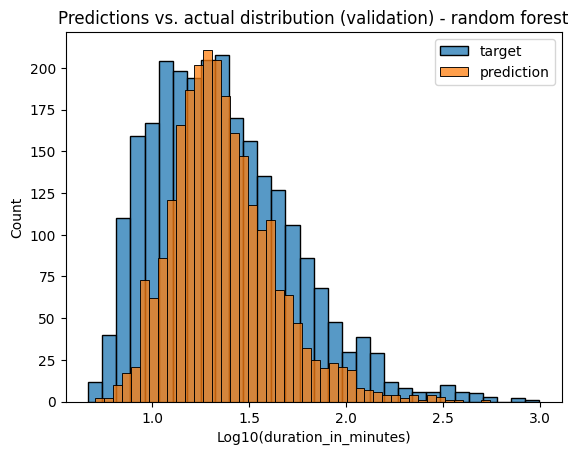

In [247]:
sns.histplot(y_val, label='target')
sns.histplot(y_val_pred_rf, label='prediction')

plt.legend()
plt.title('Predictions vs. actual distribution (validation) - random forest')
plt.xlabel('Log10(duration_in_minutes)')

In [244]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

y_train_pred_gb = gb_model.predict(X_train)
y_val_pred_gb = gb_model.predict(X_val)

train_rmse_gb = np.sqrt(mean_squared_error(y_train, y_train_pred_gb))
val_rmse_gb = np.sqrt(mean_squared_error(y_val, y_val_pred_gb))

print(f"GB Training RMSE: {train_rmse_gb:.4f}")
print(f"GB Validation RMSE: {val_rmse_gb:.4f}")

GB Training RMSE: 0.3045
GB Validation RMSE: 0.3135


Text(0.5, 0, 'Log10(duration_in_minutes)')

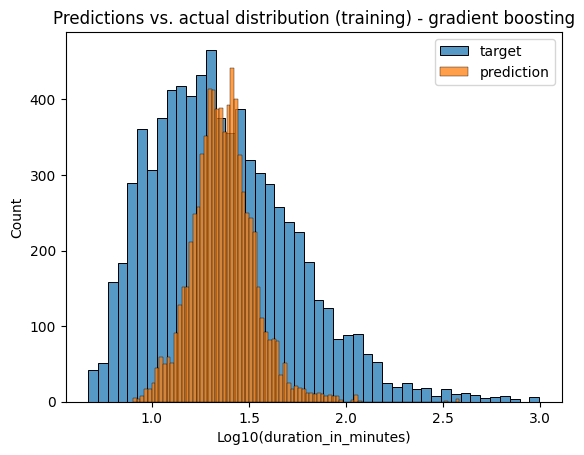

In [248]:
sns.histplot(y_train, label='target')
sns.histplot(y_train_pred_gb, label='prediction')

plt.legend()
plt.title('Predictions vs. actual distribution (training) - gradient boosting')
plt.xlabel('Log10(duration_in_minutes)')

Text(0.5, 0, 'Log10(duration_in_minutes)')

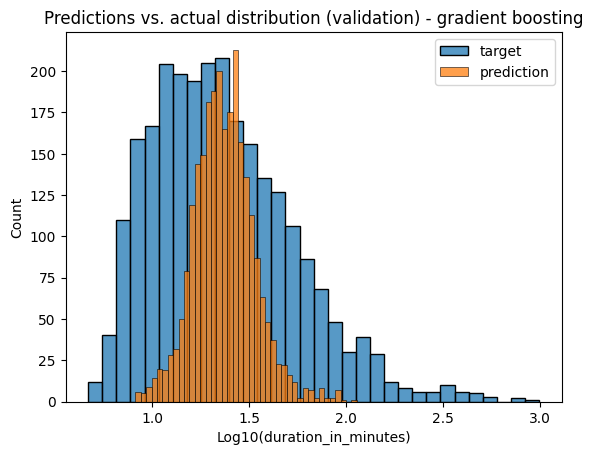

In [249]:
sns.histplot(y_val, label='target')
sns.histplot(y_val_pred_gb, label='prediction')

plt.legend()
plt.title('Predictions vs. actual distribution (validation) - gradient boosting')
plt.xlabel('Log10(duration_in_minutes)')